# House Price Prediction - Model Exploration
Exploring and comparing different machine learning models for house price prediction

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the data
df = pd.read_csv('../data_data/AmesHousing.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (2930, 82)

First few rows:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 2. Select Features and Initial Data Exploration

In [3]:
# Select features based on EDA insights
selected_features = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'MS Zoning']
target = 'SalePrice'

# Create a working dataframe with selected features and target
df_model = df[selected_features + [target]].copy()

print(f"Working dataset shape: {df_model.shape}")
print(f"\nFeatures: {selected_features}")
print(f"Target: {target}")
print(f"\nData types:")
print(df_model.dtypes)
print(f"\nMissing values:")
print(df_model.isnull().sum())

Working dataset shape: (2930, 5)

Features: ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'MS Zoning']
Target: SalePrice

Data types:
Overall Qual       int64
Gr Liv Area        int64
Total Bsmt SF    float64
MS Zoning         object
SalePrice          int64
dtype: object

Missing values:
Overall Qual     0
Gr Liv Area      0
Total Bsmt SF    1
MS Zoning        0
SalePrice        0
dtype: int64


## 3. Light Data Cleaning

### Handle Missing Values

In [4]:
# Check missing values before cleaning
print("Missing values before cleaning:")
missing_before = df_model.isnull().sum()
print(missing_before)
print(f"\nTotal missing: {missing_before.sum()}")

Missing values before cleaning:
Overall Qual     0
Gr Liv Area      0
Total Bsmt SF    1
MS Zoning        0
SalePrice        0
dtype: int64

Total missing: 1


In [5]:
# Handle missing values
# Overall Qual and Gr Liv Area  have no missing values 
# Total Bsmt SF: have only 1 missing values likely mean 0 (no basement)

# For Total Bsmt SF: fill with 0 (no basement)
df_model['Total Bsmt SF'] = df_model['Total Bsmt SF'].fillna(0)


print("Missing values after cleaning:")
print(df_model.isnull().sum())
print(f"\nDataset shape after cleaning: {df_model.shape}")

Missing values after cleaning:
Overall Qual     0
Gr Liv Area      0
Total Bsmt SF    0
MS Zoning        0
SalePrice        0
dtype: int64

Dataset shape after cleaning: (2930, 5)


### Remove Outliers (Optional but Recommended)

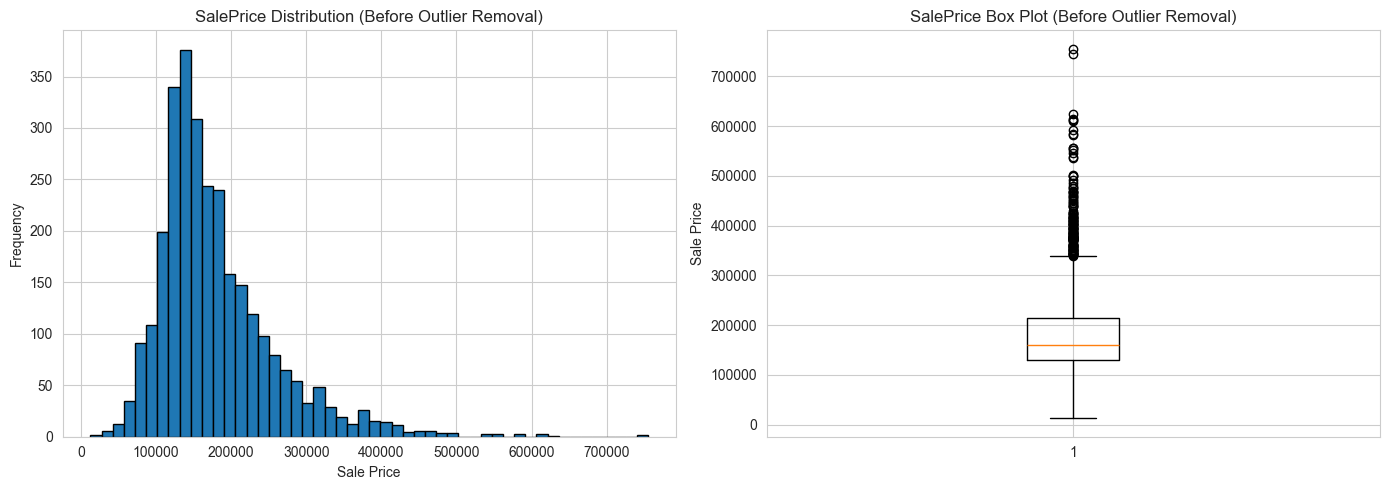

SalePrice statistics before outlier removal:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [6]:
# Visualize data before outlier removal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Target variable distribution
axes[0].hist(df_model[target], bins=50, edgecolor='black')
axes[0].set_title('SalePrice Distribution (Before Outlier Removal)')
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Frequency')

# Box plot for target
axes[1].boxplot(df_model[target])
axes[1].set_title('SalePrice Box Plot (Before Outlier Removal)')
axes[1].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

print(f"SalePrice statistics before outlier removal:")
print(df_model[target].describe())

In [7]:
# Remove outliers using IQR method for the target variable
Q1 = df_model[target].quantile(0.25)
Q3 = df_model[target].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier bounds: {lower_bound:.0f} - {upper_bound:.0f}")

# Remove outliers
df_model = df_model[(df_model[target] >= lower_bound) & (df_model[target] <= upper_bound)]

print(f"\nDataset shape after outlier removal: {df_model.shape}")
print(f"Rows removed: {df.shape[0] - df_model.shape[0]}")

Outlier bounds: 3500 - 339500

Dataset shape after outlier removal: (2793, 5)
Rows removed: 137


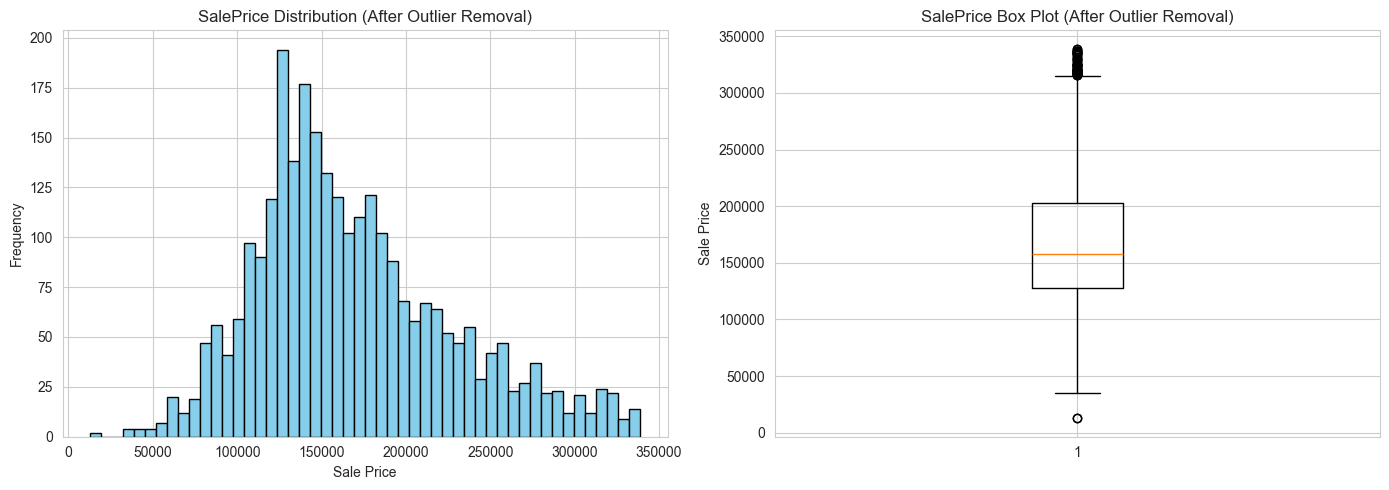

SalePrice statistics after outlier removal:
count      2793.000000
mean     169115.500179
std       58989.054743
min       12789.000000
25%      128000.000000
50%      157500.000000
75%      202900.000000
max      338931.000000
Name: SalePrice, dtype: float64


In [8]:
# Visualize data after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Target variable distribution
axes[0].hist(df_model[target], bins=50, edgecolor='black', color='skyblue')
axes[0].set_title('SalePrice Distribution (After Outlier Removal)')
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Frequency')

# Box plot for target
axes[1].boxplot(df_model[target])
axes[1].set_title('SalePrice Box Plot (After Outlier Removal)')
axes[1].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

print(f"SalePrice statistics after outlier removal:")
print(df_model[target].describe())

## 4. Feature Engineering

### Create New Features

In [9]:
print("Original features:")
print(df_model[selected_features].head())

# Feature engineering
# 1. Total living area: Gr Liv Area + Total Bsmt SF
df_model['Total Living Area'] = df_model['Gr Liv Area'] + df_model['Total Bsmt SF']

# 2. Quality to area ratio: Overall Qual / Gr Liv Area (quality per living area)
df_model['Quality Area Ratio'] = df_model['Overall Qual'] / (df_model['Gr Liv Area'] + 1)  # +1 to avoid division by zero

# 3. Basement percentage: Total Bsmt SF / Total Living Area
df_model['Basement Ratio'] = df_model['Total Bsmt SF'] / (df_model['Total Living Area'] + 1)

print("\nNew engineered features:")
print(df_model[['Total Living Area', 'Quality Area Ratio', 'Basement Ratio']].head())

Original features:
   Overall Qual  Gr Liv Area  Total Bsmt SF MS Zoning
0             6         1656         1080.0        RL
1             5          896          882.0        RH
2             6         1329         1329.0        RL
3             7         2110         2110.0        RL
4             5         1629          928.0        RL

New engineered features:
   Total Living Area  Quality Area Ratio  Basement Ratio
0             2736.0            0.003621        0.394593
1             1778.0            0.005574        0.495784
2             2658.0            0.004511        0.499812
3             4220.0            0.003316        0.499882
4             2557.0            0.003067        0.362783


In [10]:
# Update feature list to include engineered features
all_features = selected_features + ['Total Living Area', 'Quality Area Ratio', 'Basement Ratio']
print(f"All features for modeling: {all_features}")
print(f"Total features: {len(all_features)}")

All features for modeling: ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'MS Zoning', 'Total Living Area', 'Quality Area Ratio', 'Basement Ratio']
Total features: 7


### Encode Categorical Variables

In [11]:
# Check MS Zoning unique values
print(f"MS Zoning unique values: {df_model['MS Zoning'].nunique()}")
print(f"\nMS Zoning value counts:")
print(df_model['MS Zoning'].value_counts())

MS Zoning unique values: 7

MS Zoning value counts:
MS Zoning
RL         2145
RM          458
FV          134
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64


In [12]:
# Group rare MS Zoning categories into 'Other' (handle only those present)
rare_to_group = ['C (all)', 'I (all)', 'A (agr)', 'RH']
present_rare = [c for c in rare_to_group if c in df_model['MS Zoning'].unique()]
if present_rare:
    df_model['MS Zoning'] = df_model['MS Zoning'].replace(present_rare, 'Other')
    print(f"Grouped {present_rare} into 'Other'.")

print("\nMS Zoning value counts after grouping:")
print(df_model['MS Zoning'].value_counts())

# One-hot encode MS Zoning
df_model = pd.get_dummies(df_model, columns=['MS Zoning'], prefix='MSZ', drop_first=True)

# Get the new categorical feature names
categorical_features = [col for col in df_model.columns if col.startswith('MSZ_')]
print(f"\nEncoded categorical features: {categorical_features}")

# Update feature list
numeric_features = selected_features[:3] + ['Total Living Area', 'Quality Area Ratio', 'Basement Ratio']
final_features = numeric_features + categorical_features

print(f"\nFinal feature list ({len(final_features)} features):")
print(final_features)

Grouped ['C (all)', 'I (all)', 'A (agr)', 'RH'] into 'Other'.

MS Zoning value counts after grouping:
MS Zoning
RL       2145
RM        458
FV        134
Other      56
Name: count, dtype: int64

Encoded categorical features: ['MSZ_Other', 'MSZ_RL', 'MSZ_RM']

Final feature list (9 features):
['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Total Living Area', 'Quality Area Ratio', 'Basement Ratio', 'MSZ_Other', 'MSZ_RL', 'MSZ_RM']


In [13]:
# Show final dataset
print(f"Final dataset shape: {df_model.shape}")
print(f"\nFinal dataset:")
df_model.head()

Final dataset shape: (2793, 10)

Final dataset:


,Overall Qual,Gr Liv Area,Total Bsmt SF,SalePrice,Total Living Area,Quality Area Ratio,Basement Ratio,MSZ_Other,MSZ_RL,MSZ_RM
0,6,1656,1080.0,215000,2736.0,0.003621,0.394593,False,True,False
1,5,896,882.0,105000,1778.0,0.005574,0.495784,True,False,False
2,6,1329,1329.0,172000,2658.0,0.004511,0.499812,False,True,False
3,7,2110,2110.0,244000,4220.0,0.003316,0.499882,False,True,False
4,5,1629,928.0,189900,2557.0,0.003067,0.362783,False,True,False


## 5. Data Preparation for Modeling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare X and y
X = df_model[final_features]
y = df_model[target]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget variable statistics:")
print(y.describe())

Features shape: (2793, 9)
Target shape: (2793,)

Target variable statistics:
count      2793.000000
mean     169115.500179
std       58989.054743
min       12789.000000
25%      128000.000000
50%      157500.000000
75%      202900.000000
max      338931.000000
Name: SalePrice, dtype: float64


In [15]:
# Split data into train, validation, and test sets
# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 75% train, 25% val (of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Training set: 1675 samples (60.0%)
Validation set: 559 samples (20.0%)
Test set: 559 samples (20.0%)


In [32]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)
X_test_scaled = preprocessor.transform(X_test)
# print("Features scaled using StandardScaler")
# print(f"\nScaled training set statistics:")
# print(X_train_scaled.describe().round(3))

In [33]:
X_train_scaled

array([[-0.7536701 ,  0.60905537,  0.05602556, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7536701 ,  0.67383724, -0.66802827, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.57261508,  0.61769295, -0.21086118, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.02175829,  0.43630369, -0.56423898, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.79718668,  1.06252851, -0.38137214, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.02175829, -0.27197817,  0.81220464, ...,  0.        ,
         1.        ,  0.        ]], shape=(1675, 9))

## 6. Train Multiple Models

### Import Model Libraries

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

print("Model libraries imported successfully!")

Model libraries imported successfully!


### Model 1: Linear Regression

In [38]:
print("="*60)
print("MODEL 1: LINEAR REGRESSION")
print("="*60)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_val_pred_lr = lr_model.predict(X_val_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
train_r2_lr = r2_score(y_train, y_train_pred_lr)
val_r2_lr = r2_score(y_val, y_val_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
val_rmse_lr = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
val_mae_lr = mean_absolute_error(y_val, y_val_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

print(f"\nTraining Set:")
print(f"  R² Score: {train_r2_lr:.4f}")
print(f"  RMSE: ${train_rmse_lr:,.2f}")
print(f"  MAE: ${train_mae_lr:,.2f}")

print(f"\nValidation Set:")
print(f"  R² Score: {val_r2_lr:.4f}")
print(f"  RMSE: ${val_rmse_lr:,.2f}")
print(f"  MAE: ${val_mae_lr:,.2f}")

print(f"\nTest Set:")
print(f"  R² Score: {test_r2_lr:.4f}")
print(f"  RMSE: ${test_rmse_lr:,.2f}")
print(f"  MAE: ${test_mae_lr:,.2f}")

# Feature importance for linear regression
print(f"\nTop 5 Most Important Features (by coefficient):")
feature_importance_lr = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': lr_model.coef_
})
print(feature_importance_lr.reindex(feature_importance_lr['Coefficient'].abs().values.argsort()[-5:]))

MODEL 1: LINEAR REGRESSION

Training Set:
  R² Score: 0.7699
  RMSE: $27,766.47
  MAE: $20,298.84

Validation Set:
  R² Score: 0.7671
  RMSE: $29,009.01
  MAE: $21,893.32

Test Set:
  R² Score: 0.7603
  RMSE: $29,859.29
  MAE: $21,611.47

Top 5 Most Important Features (by coefficient):
              Feature   Coefficient
5      Basement Ratio   7162.259257
4  Quality Area Ratio -21378.659606
6           MSZ_Other -23560.651199
8              MSZ_RM -26336.116348
0        Overall Qual  46000.273278


### Model 2: Random Forest Regressor

In [39]:
print("\n" + "="*60)
print("MODEL 2: RANDOM FOREST REGRESSOR")
print("="*60)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
train_r2_rf = r2_score(y_train, y_train_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
val_mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print(f"\nTraining Set:")
print(f"  R² Score: {train_r2_rf:.4f}")
print(f"  RMSE: ${train_rmse_rf:,.2f}")
print(f"  MAE: ${train_mae_rf:,.2f}")

print(f"\nValidation Set:")
print(f"  R² Score: {val_r2_rf:.4f}")
print(f"  RMSE: ${val_rmse_rf:,.2f}")
print(f"  MAE: ${val_mae_rf:,.2f}")

print(f"\nTest Set:")
print(f"  R² Score: {test_r2_rf:.4f}")
print(f"  RMSE: ${test_rmse_rf:,.2f}")
print(f"  MAE: ${test_mae_rf:,.2f}")

# Feature importance
print(f"\nTop 5 Most Important Features:")
feature_importance_rf = pd.DataFrame({
    'Feature': final_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance_rf.head())


MODEL 2: RANDOM FOREST REGRESSOR

Training Set:
  R² Score: 0.9649
  RMSE: $10,849.01
  MAE: $7,976.19

Validation Set:
  R² Score: 0.7900
  RMSE: $27,545.39
  MAE: $20,132.14

Test Set:
  R² Score: 0.8043
  RMSE: $26,978.28
  MAE: $19,539.83

Top 5 Most Important Features:
              Feature  Importance
0        Overall Qual    0.463921
3   Total Living Area    0.379712
1         Gr Liv Area    0.035630
2       Total Bsmt SF    0.032221
4  Quality Area Ratio    0.031990

Training Set:
  R² Score: 0.9649
  RMSE: $10,849.01
  MAE: $7,976.19

Validation Set:
  R² Score: 0.7900
  RMSE: $27,545.39
  MAE: $20,132.14

Test Set:
  R² Score: 0.8043
  RMSE: $26,978.28
  MAE: $19,539.83

Top 5 Most Important Features:
              Feature  Importance
0        Overall Qual    0.463921
3   Total Living Area    0.379712
1         Gr Liv Area    0.035630
2       Total Bsmt SF    0.032221
4  Quality Area Ratio    0.031990


### Model 3: Gradient Boosting Regressor

In [20]:
print("\n" + "="*60)
print("MODEL 3: GRADIENT BOOSTING REGRESSOR")
print("="*60)

# Train model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_gb = gb_model.predict(X_train_scaled)
y_val_pred_gb = gb_model.predict(X_val_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate
train_r2_gb = r2_score(y_train, y_train_pred_gb)
val_r2_gb = r2_score(y_val, y_val_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)

train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
val_rmse_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))

train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
val_mae_gb = mean_absolute_error(y_val, y_val_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)

print(f"\nTraining Set:")
print(f"  R² Score: {train_r2_gb:.4f}")
print(f"  RMSE: ${train_rmse_gb:,.2f}")
print(f"  MAE: ${train_mae_gb:,.2f}")

print(f"\nValidation Set:")
print(f"  R² Score: {val_r2_gb:.4f}")
print(f"  RMSE: ${val_rmse_gb:,.2f}")
print(f"  MAE: ${val_mae_gb:,.2f}")

print(f"\nTest Set:")
print(f"  R² Score: {test_r2_gb:.4f}")
print(f"  RMSE: ${test_rmse_gb:,.2f}")
print(f"  MAE: ${test_mae_gb:,.2f}")

# Feature importance
print(f"\nTop 5 Most Important Features:")
feature_importance_gb = pd.DataFrame({
    'Feature': final_features,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance_gb.head())


MODEL 3: GRADIENT BOOSTING REGRESSOR

Training Set:
  R² Score: 0.9364
  RMSE: $14,600.62
  MAE: $11,203.74

Validation Set:
  R² Score: 0.8088
  RMSE: $26,283.96
  MAE: $19,203.27

Test Set:
  R² Score: 0.8259
  RMSE: $25,448.52
  MAE: $18,585.36

Top 5 Most Important Features:
              Feature  Importance
0        Overall Qual    0.533763
3   Total Living Area    0.332660
1         Gr Liv Area    0.034849
4  Quality Area Ratio    0.025669
2       Total Bsmt SF    0.023053


### Model 4: Support Vector Regressor

In [21]:
print("\n" + "="*60)
print("MODEL 4: SUPPORT VECTOR REGRESSOR")
print("="*60)

# Train model
svr_model = SVR(kernel='rbf', C=10000, gamma='scale', epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_val_pred_svr = svr_model.predict(X_val_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate
train_r2_svr = r2_score(y_train, y_train_pred_svr)
val_r2_svr = r2_score(y_val, y_val_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)

train_rmse_svr = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
val_rmse_svr = np.sqrt(mean_squared_error(y_val, y_val_pred_svr))
test_rmse_svr = np.sqrt(mean_squared_error(y_test, y_test_pred_svr))

train_mae_svr = mean_absolute_error(y_train, y_train_pred_svr)
val_mae_svr = mean_absolute_error(y_val, y_val_pred_svr)
test_mae_svr = mean_absolute_error(y_test, y_test_pred_svr)

print(f"\nTraining Set:")
print(f"  R² Score: {train_r2_svr:.4f}")
print(f"  RMSE: ${train_rmse_svr:,.2f}")
print(f"  MAE: ${train_mae_svr:,.2f}")

print(f"\nValidation Set:")
print(f"  R² Score: {val_r2_svr:.4f}")
print(f"  RMSE: ${val_rmse_svr:,.2f}")
print(f"  MAE: ${val_mae_svr:,.2f}")

print(f"\nTest Set:")
print(f"  R² Score: {test_r2_svr:.4f}")
print(f"  RMSE: ${test_rmse_svr:,.2f}")
print(f"  MAE: ${test_mae_svr:,.2f}")


MODEL 4: SUPPORT VECTOR REGRESSOR

Training Set:
  R² Score: 0.8257
  RMSE: $24,161.28
  MAE: $17,319.93

Validation Set:
  R² Score: 0.8014
  RMSE: $26,788.54
  MAE: $19,588.87

Test Set:
  R² Score: 0.8193
  RMSE: $25,925.52
  MAE: $19,141.25


## 7. Model Comparison and Analysis

### Performance Comparison Table

In [22]:
# Create comparison dataframe
comparison_data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR'],
    'Train R²': [train_r2_lr, train_r2_rf, train_r2_gb, train_r2_svr],
    'Val R²': [val_r2_lr, val_r2_rf, val_r2_gb, val_r2_svr],
    'Test R²': [test_r2_lr, test_r2_rf, test_r2_gb, test_r2_svr],
    'Test RMSE': [test_rmse_lr, test_rmse_rf, test_rmse_gb, test_rmse_svr],
    'Test MAE': [test_mae_lr, test_mae_rf, test_mae_gb, test_mae_svr]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*100)
print("MODEL PERFORMANCE COMPARISON")
print("="*100)
print(comparison_df.to_string(index=False))

# Identify best model
best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_r2 = comparison_df.loc[best_model_idx, 'Test R²']

print(f"\n✓ Best Model on Test Set: {best_model_name} with R² = {best_r2:.4f}")


MODEL PERFORMANCE COMPARISON
            Model  Train R²   Val R²  Test R²    Test RMSE     Test MAE
Linear Regression  0.769858 0.767077 0.760266 29859.288908 21611.470899
    Random Forest  0.964865 0.789988 0.804296 26978.277200 19539.832982
Gradient Boosting  0.936365 0.808782 0.825861 25448.519884 18585.361536
              SVR  0.825742 0.801370 0.819272 25925.518730 19141.252165

✓ Best Model on Test Set: Gradient Boosting with R² = 0.8259


### Visualize Performance Metrics

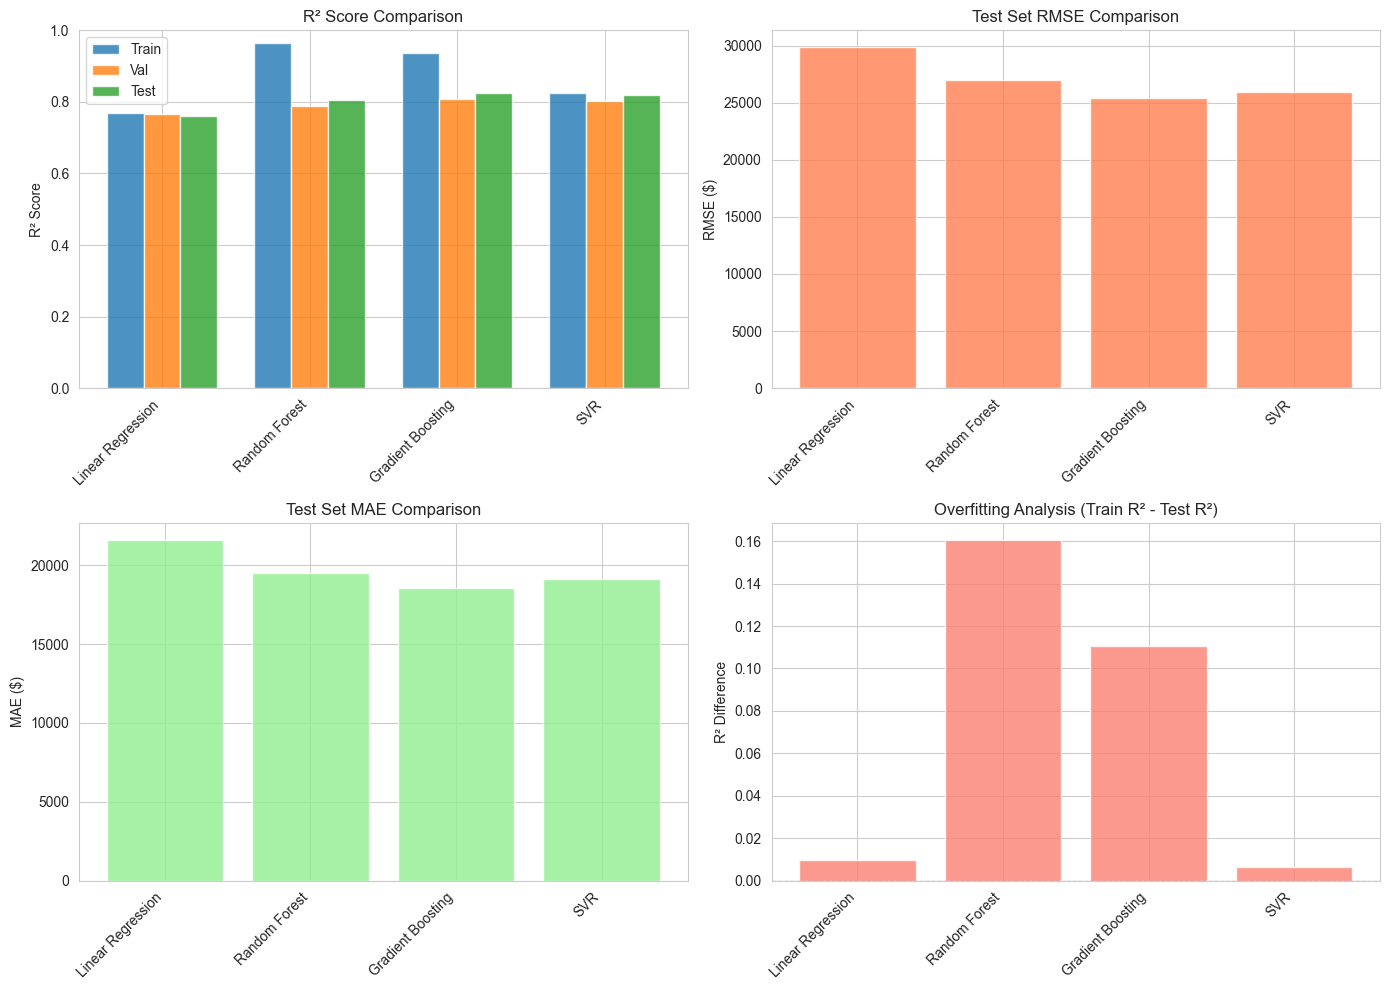

In [23]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. R² Score Comparison
models = comparison_df['Model']
x_pos = np.arange(len(models))
width = 0.25

axes[0, 0].bar(x_pos - width, comparison_df['Train R²'], width, label='Train', alpha=0.8)
axes[0, 0].bar(x_pos, comparison_df['Val R²'], width, label='Val', alpha=0.8)
axes[0, 0].bar(x_pos + width, comparison_df['Test R²'], width, label='Test', alpha=0.8)
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('R² Score Comparison')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].set_ylim([0, 1])

# 2. Test RMSE Comparison
axes[0, 1].bar(models, comparison_df['Test RMSE'], color='coral', alpha=0.8)
axes[0, 1].set_ylabel('RMSE ($)')
axes[0, 1].set_title('Test Set RMSE Comparison')
axes[0, 1].set_xticklabels(models, rotation=45, ha='right')

# 3. Test MAE Comparison
axes[1, 0].bar(models, comparison_df['Test MAE'], color='lightgreen', alpha=0.8)
axes[1, 0].set_ylabel('MAE ($)')
axes[1, 0].set_title('Test Set MAE Comparison')
axes[1, 0].set_xticklabels(models, rotation=45, ha='right')

# 4. Overfitting Analysis (Train - Test R²)
overfitting = comparison_df['Train R²'] - comparison_df['Test R²']
axes[1, 1].bar(models, overfitting, color='salmon', alpha=0.8)
axes[1, 1].set_ylabel('R² Difference')
axes[1, 1].set_title('Overfitting Analysis (Train R² - Test R²)')
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[1, 1].set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Insights:
- Tree-based model have better performance on training set obviously, due to its ability to handle non-linear relationship and multicorrelation issue with the dataset. However, it is easier for those model to fall into the overfitting issue, so we need to be carefull.

### Predictions vs Actual Values

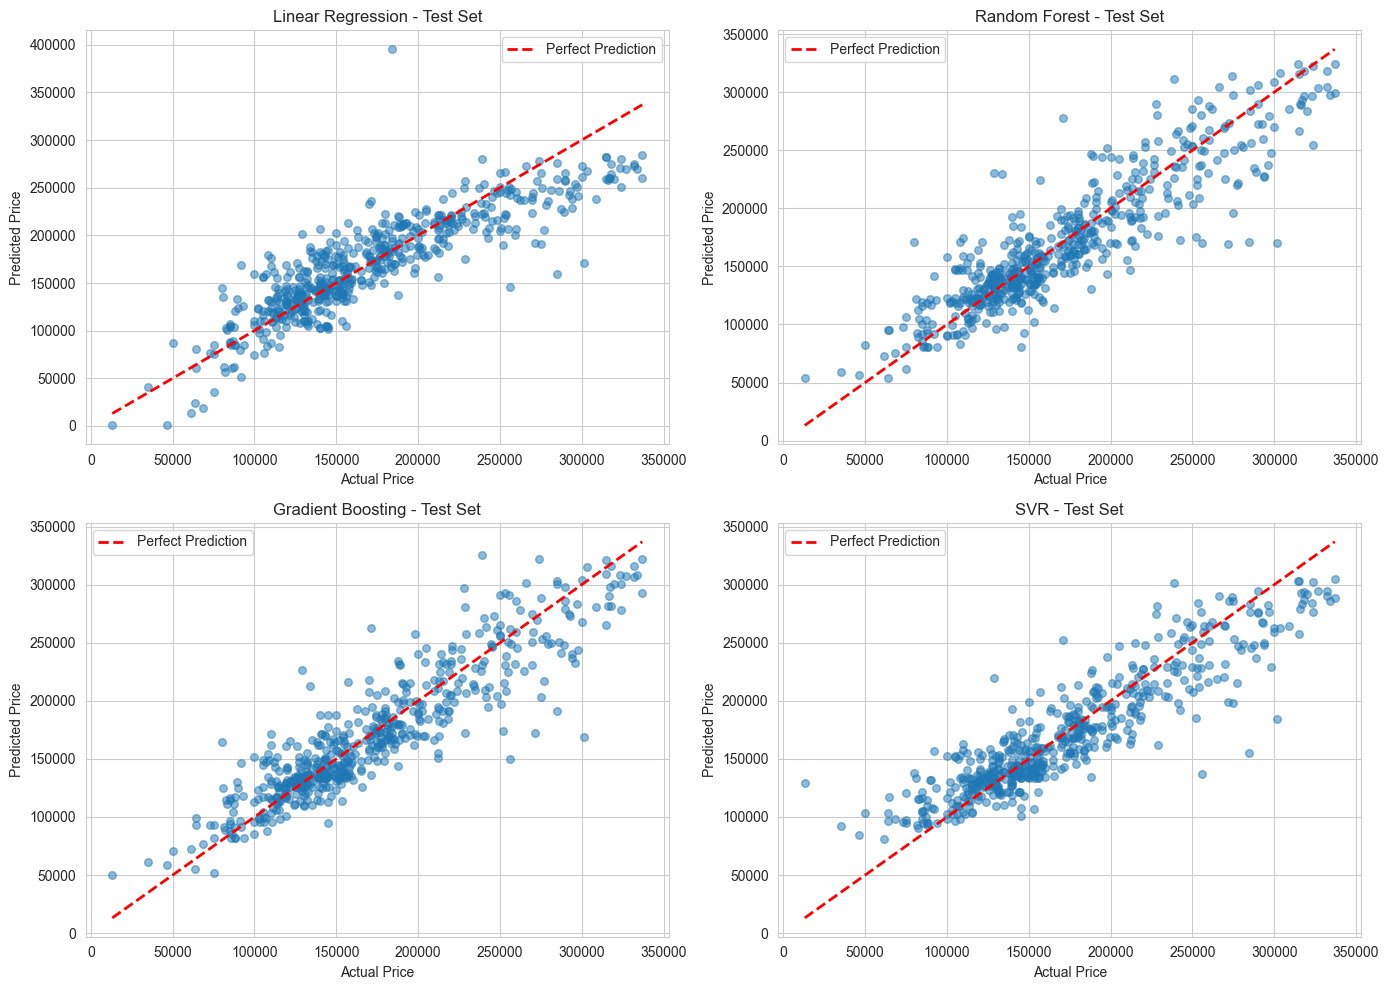

In [41]:
# Plot actual vs predicted for all models on test set
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

predictions = [
    (y_test_pred_lr, 'Linear Regression'),
    (y_test_pred_rf, 'Random Forest'),
    (y_test_pred_gb, 'Gradient Boosting'),
    (y_test_pred_svr, 'SVR')
]

axes_flat = axes.flatten()

for idx, (pred, name) in enumerate(predictions):
    axes_flat[idx].scatter(y_test, pred, alpha=0.5, s=30)
    axes_flat[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
    axes_flat[idx].set_xlabel('Actual Price')
    axes_flat[idx].set_ylabel('Predicted Price')
    axes_flat[idx].set_title(f'{name} - Test Set')
    axes_flat[idx].legend()

plt.tight_layout()
plt.show()

### Residual Analysis

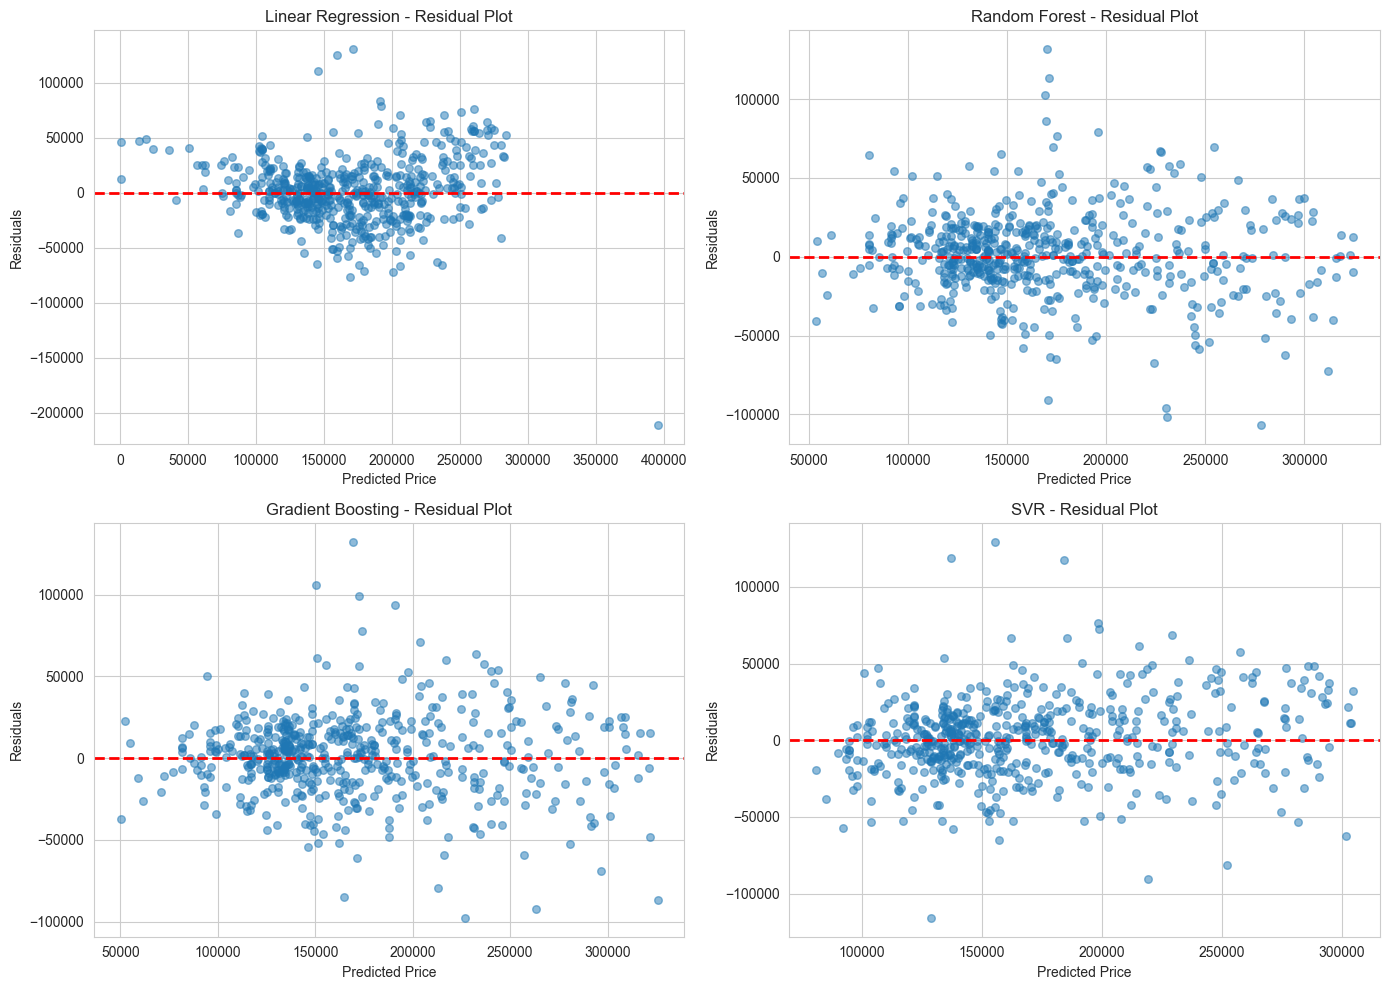

Residual Statistics (Test Set):

Linear Regression:
  Mean: $1,917.10
  Std Dev: $29,824.37
  Min: $-211,450.86
  Max: $130,539.16

Random Forest:
  Mean: $1,614.79
  Std Dev: $26,954.03
  Min: $-106,971.88
  Max: $131,584.60

Gradient Boosting:
  Mean: $1,347.28
  Std Dev: $25,435.59
  Min: $-97,661.88
  Max: $132,380.80

SVR:
  Mean: $1,455.01
  Std Dev: $25,907.84
  Min: $-115,805.23
  Max: $129,442.88


In [25]:
# Plot residuals for all models on test set
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

residuals_list = [
    (y_test - y_test_pred_lr, 'Linear Regression'),
    (y_test - y_test_pred_rf, 'Random Forest'),
    (y_test - y_test_pred_gb, 'Gradient Boosting'),
    (y_test - y_test_pred_svr, 'SVR')
]

axes_flat = axes.flatten()

for idx, (residuals, name) in enumerate(residuals_list):
    axes_flat[idx].scatter(y_test_pred_lr if idx == 0 else 
                          y_test_pred_rf if idx == 1 else 
                          y_test_pred_gb if idx == 2 else 
                          y_test_pred_svr, residuals, alpha=0.5, s=30)
    axes_flat[idx].axhline(y=0, color='r', linestyle='--', lw=2)
    axes_flat[idx].set_xlabel('Predicted Price')
    axes_flat[idx].set_ylabel('Residuals')
    axes_flat[idx].set_title(f'{name} - Residual Plot')

plt.tight_layout()
plt.show()

print("Residual Statistics (Test Set):")
for residuals, name in residuals_list:
    print(f"\n{name}:")
    print(f"  Mean: ${residuals.mean():,.2f}")
    print(f"  Std Dev: ${residuals.std():,.2f}")
    print(f"  Min: ${residuals.min():,.2f}")
    print(f"  Max: ${residuals.max():,.2f}")

## 8. Feature Importance Summary